In [1]:
push!(LOAD_PATH, "..")
using ASE
using MatSciPy
using PyPlot
using PyCall
using TightBinding

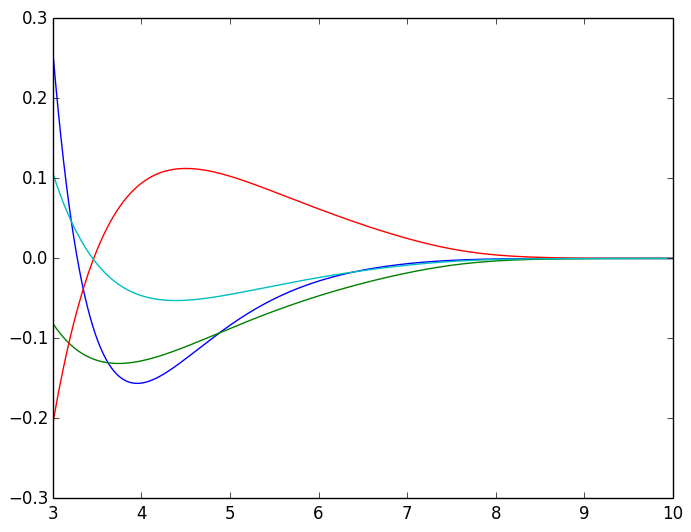

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x18552f10>

In [73]:
x = 3.0:0.01:10.0
y1 = zeros(length(x))
y2 = zeros(length(x))
y3 = zeros(length(x))
y4 = zeros(length(x))
for k = 1:length(x)
    y1[k] = NRLTB.h_hop(x[k], 1, NRLTB.Si_sp)
    y2[k] = NRLTB.h_hop(x[k], 2, NRLTB.Si_sp)
    y3[k] = NRLTB.h_hop(x[k], 3, NRLTB.Si_sp)
    y4[k] = NRLTB.h_hop(x[k], 4, NRLTB.Si_sp)
end
plot(x,y1)
plot(x,y2)
plot(x,y3)
plot(x,y4)

### Test band structure of Silicon

In [74]:
at = bulk("Si"; cubic=true)
at = repeat(at, (3, 3, 3))
set_pbc!(at, [true, true, true])
X = positions(at)
# plot3D(X[1,:][:], X[2,:][:], X[3,:][:], "b.")
print(length(at))
cell(at)

216

3x3 Array{Float64,2}:
 16.29   0.0    0.0 
  0.0   16.29   0.0 
  0.0    0.0   16.29

In [77]:
reload("TightBinding")
reload("NRLTB")

tbm = NRLTB.NRLTBModel(elem = NRLTB.Si_sp)
set_pbc!(at, [true, true, true])
tbm.nkpoints = (8,8,8)

K, E = TightBinding.band_structure_all(at, tbm);

LoadError: LoadError: UndefVarError: band_structure_near_all not defined
while loading In[77], in expression starting on line 8

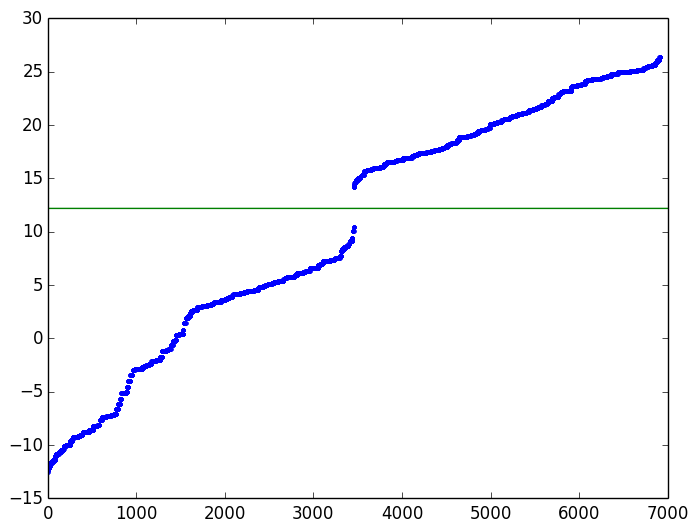

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1c144350>

In [59]:
HAR = 27.211

F = E[:]
IsortF = sortperm(F[:])
plot(HAR * F[IsortF], ".")
#H = G[:]
#IsortG = sortperm(H[:])
#plot(HAR * H[IsortG], "r.")

#axis([3300, 3500, 15, 24])

x = 1:7000
y = x.^0 * tbm.eF * HAR
plot(x,y)

In [ ]:
import NRLTB
reload("TightBinding")
reload("NRLTB")
tbm = NRLTB.NRLTBModel(elem = NRLTB.Si_sp)

tbm.nkpoints = (8,8,8)

K, E = TightBinding.band_structure_near_eF(at, tbm)

# take a very low temperature to approximate the fermi level at 0 temperature
tbm.fixed_eF = false
tbm.smearing.beta = 500
TightBinding.update_eF!(at, tbm)
EF = tbm.eF

n = size(K,2)
kk = zeros(n)
for k = 1:n
    kk[k] = norm(K[:,k])
end

plot(kk, E[1,:][:], "g.")
plot(kk, E[2,:][:], "b.")
plot(kk, E[3,:][:], "r.")
plot(kk, E[4,:][:], "y.")
plot(kk, E[5,:][:], "g.")
plot(kk, E[6,:][:], "b.")
plot(kk, E[7,:][:], "r.")
plot(kk, E[8,:][:], "y.")
plot(kk, ones(n)*EF, "k-" )
ef = tbm.eF

In [60]:
# remove an atom at center

X = positions(at)
na = length(at)
Y = zeros(3,na-1)
Y = X[:,1:na-1]

3x215 Array{Float64,2}:
 0.0  1.3575  0.0    1.3575  2.715  …  12.2175  13.575  14.9325  13.575
 0.0  1.3575  2.715  4.0725  0.0       14.9325  10.86   12.2175  13.575
 0.0  1.3575  2.715  4.0725  2.715     14.9325  13.575  14.9325  10.86 

In [61]:
using PyCall
@pyimport ase

#at_vac = ase.Atoms()
at_vac = ASEAtoms( ase.Atoms("Si215") )
set_cell!(at_vac, cell(at))
set_positions!(at_vac, Y)
set_pbc!(at_vac, [true, true, true])

X_vac = positions(at_vac)
# plot3D(X_vac[1,:][:], X_vac[2,:][:], X_vac[3,:][:], "b.")
print(length(at_vac))

215

In [63]:
reload("TightBinding")
reload("NRLTB")

tbm = NRLTB.NRLTBModel(elem = NRLTB.Si_sp)
set_pbc!(at, [true, true, true])
tbm.nkpoints = (2,2,2)

K, G = TightBinding.band_structure_all(at_vac, tbm);

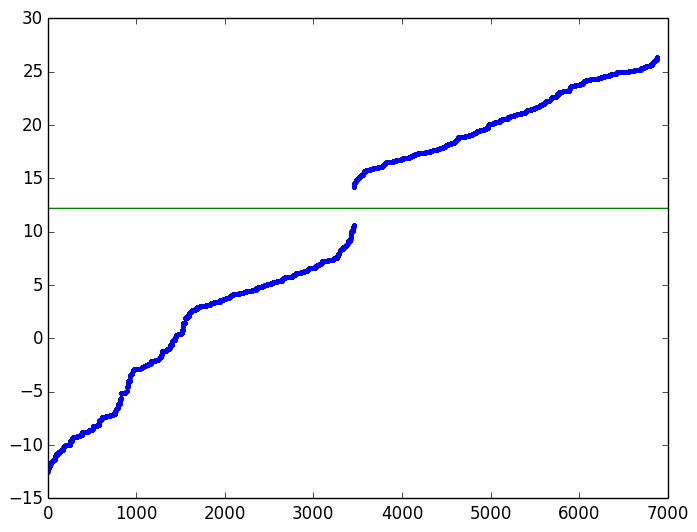

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0xded5d90>

In [66]:
HAR = 27.211

H = G[:]
Isort = sortperm(H[:])
plot(HAR * H[Isort], ".")

# axis([0, 7000, 10, 15])

x = 1:7000
y = x.^0 * ef * HAR
plot(x,y)

0.36875025045671966

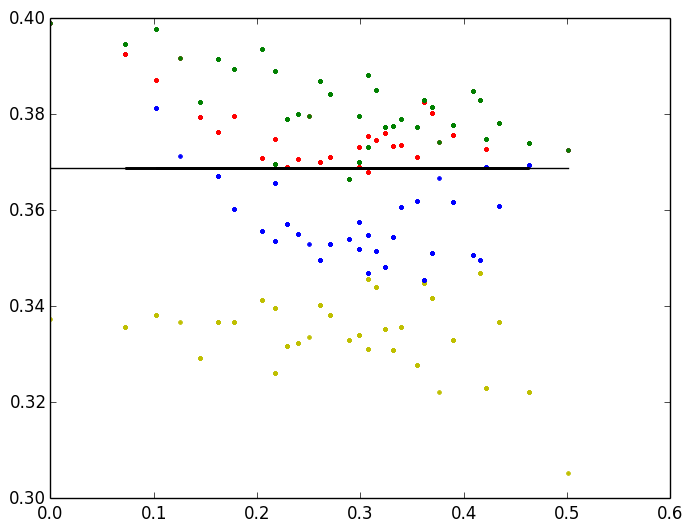

In [8]:
import NRLTB
reload("TightBinding")
reload("NRLTB")
tbm = NRLTB.NRLTBModel(elem = NRLTB.Si_sp)

set_pbc!(at_vac, [true, true, true])
tbm.nkpoints = (8,8,8)

K, E = TightBinding.band_structure_near_eF(at_vac, tbm)

# take a very low temperature to approximate the fermi level at 0 temperature
tbm.fixed_eF = false
tbm.smearing.beta = 1000
TightBinding.update_eF!(at_vac, tbm)
EF = tbm.eF

n = size(K,2)
kk = zeros(n)
for k = 1:n
    kk[k] = norm(K[:,k])
end

plot(kk, E[1,:][:], "y.")
plot(kk, E[2,:][:], "b.")
plot(kk, E[3,:][:], "r.")
plot(kk, E[4,:][:], "g.")
plot(kk, E[5,:][:], "y.")
plot(kk, E[6,:][:], "b.")
plot(kk, E[7,:][:], "r.")
plot(kk, E[8,:][:], "g.")
plot(kk, ones(n)*EF, "k-" )

print(EF)

### Test band structure of Carbon

In [3]:
at = bulk("C"; cubic=true)
at = repeat(at, (3, 3, 3))
X = positions(at)
# set_pbc!(at, [false, false, false])
# plot3D(X[1,:][:], X[2,:][:], X[3,:][:], "b.")
print(length(at))

216

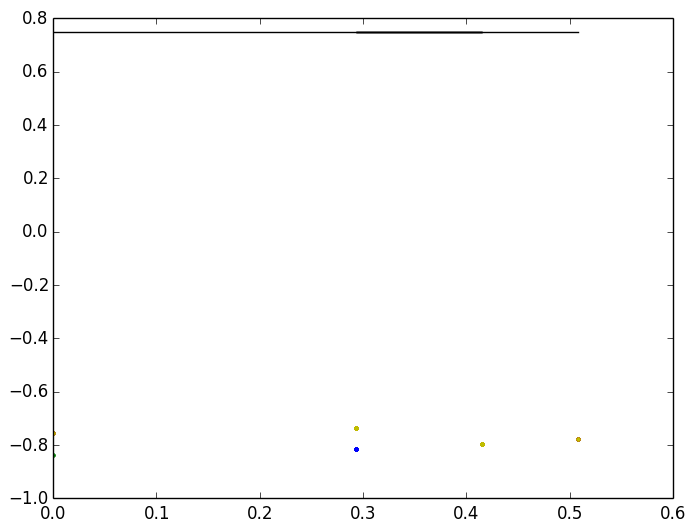

0.7502283973158785

In [42]:
import NRLTB
reload("TightBinding")
reload("NRLTB")
tbm = NRLTB.NRLTBModel(elem = NRLTB.C_sp)

set_pbc!(at, [true, true, true])
tbm.nkpoints = (2,2,2)

K, E = TightBinding.band_structure(at, tbm)

# take a very low temperature to approximate the fermi level at 0 temperature
tbm.fixed_eF = false
tbm.smearing.beta = 500
TightBinding.update_eF!(at, tbm)
EF = tbm.eF

n = size(K,2)
kk = zeros(n)
for k = 1:n
    kk[k] = norm(K[:,k])
end

plot(kk, E[1,:][:], "g.")
hold
plot(kk, E[2,:][:], "b.")
plot(kk, E[3,:][:], "r.")
plot(kk, E[4,:][:], "y.")
plot(kk, ones(n)*EF, "k-" )

ef = tbm.eF

In [43]:
reload("TightBinding")
reload("NRLTB")

tbm = NRLTB.NRLTBModel(elem = NRLTB.C_sp)
set_pbc!(at, [true, true, true])
tbm.nkpoints = (2,2,2)

K, E = TightBinding.band_structure(at, tbm);

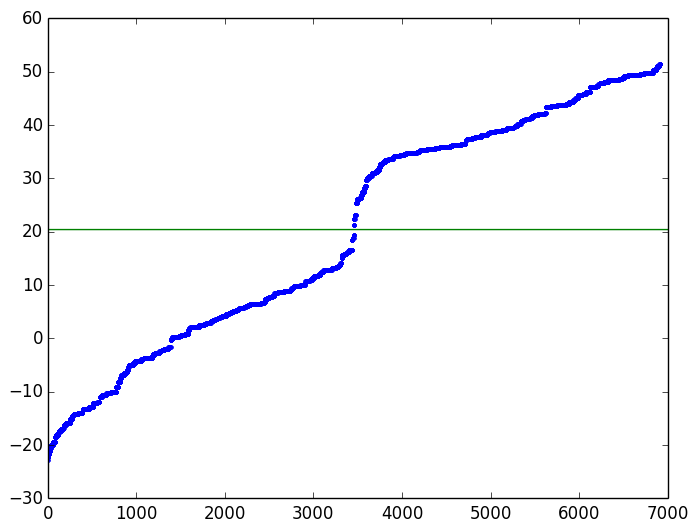

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1b4eb710>

In [52]:
HAR = 27.211

F = E[:]
IsortF = sortperm(F[:])
plot(HAR * F[IsortF], ".")
#H = G[:]
#IsortG = sortperm(H[:])
#plot(HAR * H[IsortG], "r.")

#axis([3300, 3500, 15, 24])

x = 1:7000
y = x.^0 * ef * HAR
plot(x,y)

In [25]:
# remove an atom at center

X = positions(at)
na = length(at)
Y = zeros(3,na-1)
Y = X[:,1:na-1]

# from ase import Atoms
# using PyCall
# @pyimport ase
# at_vac = ASEAtoms( ase.Atoms(symbols = "C63", positions = Y, cell = cell(at), pbc = [true, true, true]) )

3x215 Array{Float64,2}:
 0.0  0.8925  0.0    0.8925  1.785  …  7.14   8.0325  8.925  9.8175  8.925
 0.0  0.8925  1.785  2.6775  0.0       8.925  9.8175  7.14   8.0325  8.925
 0.0  0.8925  1.785  2.6775  1.785     8.925  9.8175  8.925  9.8175  7.14 

In [27]:
using PyCall
@pyimport ase

#at_vac = ase.Atoms()
at_vac = ASEAtoms( ase.Atoms("C215") )
set_cell!(at_vac, cell(at))
set_positions!(at_vac, Y)
set_pbc!(at_vac, [true, true, true])

X_vac = positions(at_vac)
#plot3D(X_vac[1,:][:], X_vac[2,:][:], X_vac[3,:][:], "b.")
print(length(at_vac))

215

In [39]:
reload("TightBinding")
reload("NRLTB")

tbm = NRLTB.NRLTBModel(elem = NRLTB.C_sp)
set_pbc!(at, [true, true, true])
tbm.nkpoints = (2,2,2)

K, G = TightBinding.band_structure(at_vac, tbm);

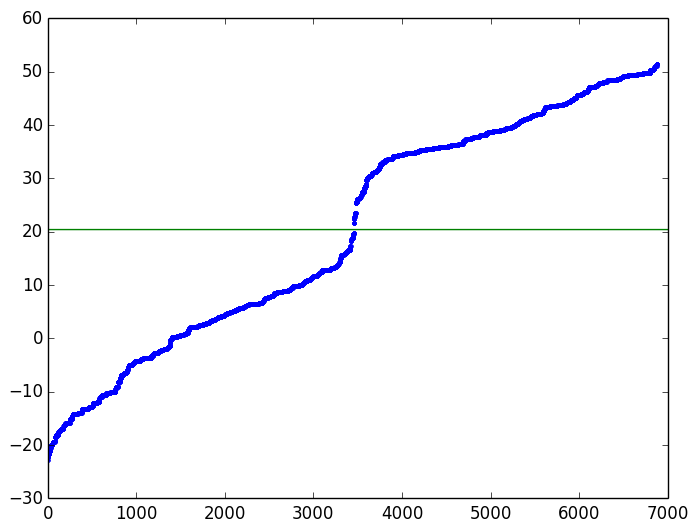

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1b51ff90>

In [53]:
HAR = 27.211

H = G[:]
Isort = sortperm(H[:])
plot(HAR * H[Isort], ".")

# axis([0, 7000, 15, 25])

x = 1:7000
y = x.^0 * ef * HAR
plot(x,y)

0.6795231949119179

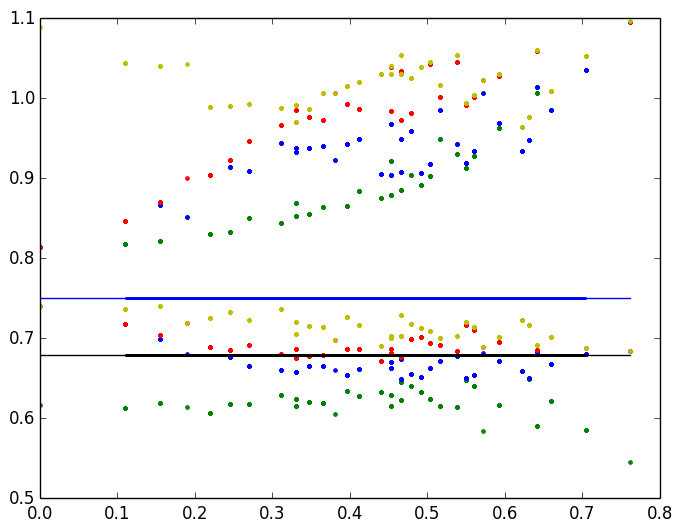

In [14]:
import NRLTB
reload("TightBinding")
reload("NRLTB")
tbm = NRLTB.NRLTBModel(elem = NRLTB.C_sp)

set_pbc!(at_vac, [true, true, true])
tbm.nkpoints = (8,8,8)

K, E = TightBinding.band_structure(at_vac, tbm)

# take a very low temperature to approximate the fermi level at 0 temperature
tbm.fixed_eF = false
tbm.smearing.beta = 500
TightBinding.update_eF!(at_vac, tbm)
EF = tbm.eF

n = size(K,2)
kk = zeros(n)
for k = 1:n
    kk[k] = norm(K[:,k])
end

plot(kk, E[1,:][:], "g.")
plot(kk, E[2,:][:], "b.")
plot(kk, E[3,:][:], "r.")
plot(kk, E[4,:][:], "y.")
plot(kk, E[5,:][:], "g.")
plot(kk, E[6,:][:], "b.")
plot(kk, E[7,:][:], "r.")
plot(kk, E[8,:][:], "y.")
plot(kk, ones(n)*EF, "k-" )
plot(kk, ones(n)*0.7502348995952292, "-" )

print(EF)

### Test toy TB model for Al

In [4]:
at = bulk("Al")#; cubic=true)
at = repeat(at, (2, 2, 2))
X = positions(at)
# set_pbc!(at, [false, false, false])
# plot3D(X[1,:][:], X[2,:][:], X[3,:][:], "b.")
print(length(at))

8

In [3]:
# reload("Potentials")
# reload("tbtoymodel")
# reload("TightBinding")
# reload("MatSciPy")
tbm = TightBinding.ToyTB.ToyTBModel(r0=2.5, rcut=6.0)
E = TightBinding.potential_energy(at, tbm)
println("E = ", E)
frc = TightBinding.forces(at, tbm)
println("|f|∞ = ", norm(frc[:], Inf))

E = -15.758671486710963
|f|∞ = 4.40619762898109e-16


In [7]:
set_pbc!(at, [false, false, false])

reload("TightBinding")
tbm = TightBinding.ToyTB.ToyTBModel(r0=2.5, rcut=6.0)
E = TightBinding.potential_energy(at, tbm)
println("E = ", E)
frc = TightBinding.forces(at, tbm)
println("|f|∞ = ", norm(frc[:], Inf))

E = -

2.2402263145143673
|f|∞ = 0.14601367064044007


In [5]:
reload("Potentials")
reload("TightBinding")
reload("tbtoymodel")

set_pbc!(at, [false, false, false])
#set_pbc!(at, [true, true, true])

tbm = TightBinding.ToyTB.ToyTBModel(r0=2.5, rcut=8.0)
X = positions(at)
f = TightBinding.potential_energy(at, tbm)
df = TightBinding.forces(at, tbm)[:]
    println("-----------------------------")
    println("  p | error ")
    println("----|------------------------")
    for p = 2:12
        h = 0.1^p
        dfh = zeros(length(df))
        for n = 1:length(df)
            X[n] += h
            set_positions!(at, X)
            dfh[n] = (TightBinding.potential_energy(at, tbm) - f) / h
            X[n] -= h
        end
    #@printf(" %2d | %1.7e \n", p, norm(df - dfh, Inf))
    @printf(" %2d | %1.7e \n", p, norm(dfh + df, Inf))
    end
println("-----------------------------")


-----------------------------
  p | error 
----|------------------------
  2 | 1.4867346e-03 
  3 | 1.4867270e-04 
  4 | 1.4867263e-05 
  5 | 1.4865886e-06 
  6 | 1.5010215e-07 
  7 | 2.4461734e-08 
  8 | 3.1718760e-07 
  9 | 3.1797765e-06 
 10 | 3.8596093e-05 
 11 | 3.8683979e-04 
 12 | 3.9968029e-03 
-----------------------------


### Test NRL-TB model for Al

In [7]:
# TEST the NRL-TB hamiltonian constructor
import NRLTB
reload("NRLTB")
a = rand(3)*6

f = NRLTB.mat_local(norm(a), a, NRLTB.Al_spd, "H")
df = NRLTB.d_mat_local(norm(a), a, NRLTB.Al_spd, "dH")
println("-----------------------------")
println("  p | error ")
println("----|------------------------")
for p = 2:12
    h = 0.1^p
    dfh = zeros(size(df))
    for n = 1:3
        a[n] += h
        fh = NRLTB.mat_local(norm(a), a, NRLTB.Al_spd, "H")
        dfh[n,:] = (fh - f) / h
        a[n] -= h
    end
    err = reshape(dfh - df, 3*81)
    @printf(" %2d | %1.7e \n", p, norm(err,Inf))
end
println("-----------------------------")

-----------------------------
  p | error 
----|------------------------
  2 | 4.7936432e-04 
  3 | 4.8252387e-05 
  4 | 4.8284068e-06 
  5 | 4.8288380e-07 
  6 | 4.8356390e-08 
  7 | 4.7385025e-09 
  8 | 1.5400929e-08 
  9 | 1.1461380e-07 
 10 | 1.1590824e-06 
 11 | 9.4107278e-06 
 12 | 1.6019853e-04 
-----------------------------


In [16]:
# TEST NRL-TB for Aluminum FCC

reload("SparseTools")
reload("Potentials")
reload("TightBinding")
reload("NRLTB")    
BOHR = 0.52917721092 

set_pbc!(at, [false, false, false])
tbm = NRLTB.NRLTBModel(elem = NRLTB.Al_spd)
tbm.nkpoints = (0,0,0)

X = positions(at)
f = TightBinding.potential_energy(at, tbm)
df = TightBinding.forces(at, tbm)[:] # / BOHR
    println("-----------------------------")
    println("  p | error ")
    println("----|------------------------")
for p = 2:12
    h = 0.1^p 
    dfh = zeros(length(df))
    for n = 1:length(df)
        X[n] += h
        set_positions!(at, X)
        dfh[n] = (TightBinding.potential_energy(at, tbm) - f) / h
        X[n] -= h
    end
    @printf(" %2d | %1.7e \n", p, norm(dfh + df, Inf))
end
println("-----------------------------")

-----------------------------
  p | error 
----|------------------------
  2 | 3.3318517e-04 
  3 | 3.3257017e-05 
  4 | 3.3251270e-06 
  5 | 3.3253385e-07 
  6 | 3.2684817e-08 
  7 | 6.1106526e-08 
  8 | 8.1074127e-07 
  9 | 8.9428907e-06 
 10 | 5.5128169e-05 
 11 | 7.6567090e-04 
 12 | 4.7365781e-03 
-----------------------------


In [5]:
# TEST NRL-TB for Aluminum FCC
# WITH PERIODIC BOUNDARY CONDITION ON THIRD DIMENSION
# TAKE nkpoints = (0,0,4)

reload("SparseTools")
reload("Potentials")
reload("TightBinding")
reload("NRLTB")    
BOHR = 0.52917721092 

set_pbc!(at, [true, true, true])
tbm = NRLTB.NRLTBModel(elem = NRLTB.Al_spd)
tbm.nkpoints = (4,4,4)


X = positions(at)
f = TightBinding.potential_energy(at, tbm)
df = TightBinding.forces(at, tbm)[:] # / BOHR
    println("-----------------------------")
    println("  p | error ")
    println("----|------------------------")
for p = 2:10
    h = 0.1^p 
    dfh = zeros(length(df))
    for n = 1:length(df)
        X[n] += h
        set_positions!(at, X)
        dfh[n] = (TightBinding.potential_energy(at, tbm) - f) / h
        X[n] -= h
    end
    @printf(" %2d | %1.7e \n", p, norm(dfh + df, Inf))
end
println("-----------------------------")

-----------------------------
  p | error 
----|------------------------
  2 | 3.8865616e-04 
  3 | 3.8892178e-05 
  4 | 3.8894044e-06 
  5 | 3.8937742e-07 
  6 | 4.6185278e-08 
  7 | 1.0658141e-07 
  8 | 7.1054274e-07 
  9 | 3.5527137e-06 
 10 | 7.1054274e-05 
-----------------------------


## TEST site energy and site force

In [3]:
# TEST NRL-TB site energy for Aluminum FCC
# WITH open BOUNDARY CONDITION ON THIRD DIMENSION

using AtomsInterface
reload("SparseTools")
reload("Potentials")
reload("TightBinding")
reload("NRLTB")  

set_pbc!(at, [false, false, false])
tbm = NRLTB.NRLTBModel(elem = NRLTB.Al_spd)
tbm.nkpoints = (0,0,0)

X = positions(at)

Es_all = TightBinding.site_energy([1:length(at);], at, tbm)
Etot = TightBinding.potential_energy(at, tbm)
println("E - ∑ E_i = ", Etot - r_sum(Es_all))
println("------------------------------")

println("Finite-difference test")
Es = TightBinding.site_energy(1, at, tbm)
Fs = TightBinding.site_forces(1, at, tbm)[:]

println("-----------------------------")
println("  p | error ")
println("----|------------------------")
for p = 2:12
    h = 0.1^p 
    dEsh = zeros(length(Fs))
    for n = 1:length(Fs)
        X[n] += h
        set_positions!(at, X)
        dEsh[n] = (TightBinding.site_energy(1, at, tbm) - Es) / h
        X[n] -= h
    end
    @printf(" %2d | %1.7e \n", p, norm(dEsh + Fs, Inf))
end
println("-----------------------------")

E - ∑ E_i = 1.7763568394002505e-15
------------------------------
Finite-difference test
-----------------------------
  p | error 
----|------------------------
  2 | 1.8566967e-04 
  3 | 1.8596652e-05 
  4 | 1.8599778e-06 
  5 | 1.8603239e-07 
  6 | 2.0431525e-08 
  7 | 2.7374072e-08 
  8 | 3.2581899e-07 
  9 | 1.3966640e-06 
 10 | 1.6372396e-05 
 11 | 1.7062366e-04 
 12 | 1.6298718e-03 
-----------------------------


In [3]:
# TEST NRL-TB site energy for Aluminum FCC
# WITH periodic BOUNDARY CONDITION ON THIRD DIMENSION

using AtomsInterface
reload("SparseTools")
reload("Potentials")
reload("TightBinding")
reload("NRLTB")  

set_pbc!(at, [false, false, true])
tbm = NRLTB.NRLTBModel(elem = NRLTB.Al_spd)
tbm.nkpoints = (0,0,0)

X = positions(at)

Es_all = TightBinding.site_energy([1:length(at);], at, tbm)
Etot = TightBinding.potential_energy(at, tbm)
println("E - ∑ E_i = ", Etot - r_sum(Es_all))
println("------------------------------")

println("Finite-difference test")
Es = TightBinding.site_energy(1, at, tbm)
Fs = TightBinding.site_forces(1, at, tbm)[:]

println("-----------------------------")
println("  p | error ")
println("----|------------------------")
for p = 2:12
    h = 0.1^p 
    dEsh = zeros(length(Fs))
    for n = 1:length(Fs)
        X[n] += h
        set_positions!(at, X)
        dEsh[n] = (TightBinding.site_energy(1, at, tbm) - Es) / h
        X[n] -= h
    end
    @printf(" %2d | %1.7e \n", p, norm(dEsh + Fs, Inf))
end
println("-----------------------------")

E - ∑ E_i = -1.7763568394002505e-15
------------------------------
Finite-difference test
-----------------------------
  p | error 
----|------------------------
  2 | 4.0478141e-04 
  3 | 4.0374202e-05 
  4 | 4.0363689e-06 
  5 | 4.0347931e-07 
  6 | 4.1744386e-08 
  7 | 3.1675312e-08 
  8 | 2.0657823e-07 
  9 | 1.7763568e-06 
 10 | 1.7598920e-05 
 11 | 2.7367671e-04 
 12 | 1.7763568e-03 
-----------------------------


### performance 

In [24]:
reload("SparseTools")
reload("Potentials")
reload("TightBinding")
reload("NRLTB")    

at = bulk("Al"; cubic=true)
at = repeat(at, (2, 2, 2))
set_pbc!(at, [true, true, true])
tbm = NRLTB.NRLTBModel(elem = NRLTB.Al_spd)
tbm.nkpoints = (0,0,2)

@time df = TightBinding.forces(at, tbm)[:];
@time df = TightBinding.forces_(at, tbm)[:];
@time df = TightBinding.forces(at, tbm)[:];
@time df = TightBinding.forces_(at, tbm)[:];

ctr = 331776
  3.715835 seconds (9.36 M allocations: 1.757 GB, 8.19% gc time)
ctr = 17978112
 15.347712 seconds (111.72 M allocations: 2.286 GB, 3.60% gc time)
ctr = 331776
  1.342842 seconds (5.29 M allocations: 1.259 GB, 16.70% gc time)
ctr = 17978112
 15.253434 seconds (111.57 M allocations: 2.280 GB, 3.55% gc time)


# Performance Tests (CO)

In [1]:
push!(LOAD_PATH, "..")
using ASE, TestAtoms
import TightBinding
import NRLTB
import ProfileView, Base.Profile

In [3]:
at = bulk("Al"; cubic=true)
at = repeat(at, (2, 2, 1))
set_pbc!(at, [false, false, true])
X = positions(at)
tbm = NRLTB.NRLTBModel(elem = NRLTB.Al_spd)
# tbm = TightBinding.ToyTB.ToyTBModel()
tbm.nkpoints = (0,0,0)
TestAtoms.test_potentialenergy(tbm, at)
set_positions!(at, X+0.1*rand(size(X)))
@time E = TightBinding.potential_energy(at, tbm)
set_positions!(at, X+0.1*rand(size(X)))
@time E = TightBinding.potential_energy(at, tbm)
set_positions!(at, X+0.1*rand(size(X)))
@time E = TightBinding.potential_energy(at, tbm)
set_positions!(at, X+0.1*rand(size(X)))
@time E = TightBinding.potential_energy(at, tbm)

@time df = TightBinding.forces(at, tbm);
@time df = TightBinding.forces(at, tbm);
@time df = TightBinding.forces(at, tbm);
@time df = TightBinding.forces(at, tbm);

# TightBinding.forces_debug(at, tbm)
;

-----------------------------
  p | error 
----|------------------------
  2 | 1.6082659e-03 
  3 | 1.6084285e-04 
  4 | 1.6084343e-05 
  5 | 1.6093793e-06 
  6 | 1.7053026e-07 
  7 | 1.4210855e-07 
  8 | 1.4210855e-06 
  9 | 9.0469449e-06 
 10 | 1.1677271e-04 
-----------------------------
  0.035420 seconds (49.74 k allocations: 21.602 MB, 6.34% gc time)
  0.039333 seconds (49.51 k allocations: 21.567 MB, 11.82% gc time)
  0.037315 seconds (49.51 k allocations: 21.567 MB, 6.98% gc time)
  0.037895 seconds (49.46 k allocations: 21.556 MB, 6.05% gc time)
  0.046265 seconds (138.00 k allocations: 35.888 MB, 13.48% gc time)
  0.035591 seconds (138.00 k allocations: 35.888 MB, 5.70% gc time)
  0.040717 seconds (138.00 k allocations: 35.888 MB, 10.11% gc time)
  0.038626 seconds (138.00 k allocations: 35.888 MB, 10.85% gc time)


In [13]:
@code_warntype TightBinding.hamiltonian(at, tbm, rand(3))

In [3]:


at = bulk("Al"; cubic=true)
at = repeat(at, (4, 4, 1))
X = positions(at)
set_pbc!(at, [false, false, true])
tbm = NRLTB.NRLTBModel(elem = NRLTB.Al_spd)
# tbm = TightBinding.ToyTB.ToyTBModel()
tbm.nkpoints = (0,0,4)

Profile.clear()
@profile f = TightBinding.potential_energy(at, tbm);
set_positions!(at, X+0.1*rand(size(X)))
@profile f = TightBinding.potential_energy(at, tbm);


In [ ]:
ProfileView.view()

### Test ForwardDiff for dH, d2H, and d3H

In [3]:
a = rand(3)*2

3-element Array{Float64,1}:
 1.82542
 1.09931
 1.53345

In [4]:
# TEST the ForwardDiff for NRL-TB hamiltonian derivatives
import NRLTB
reload("NRLTB")
BOHR = 0.52917721092 

h = zeros(4,4)
f = zeros(4,4)
dh = zeros(3,4,4)
# f = NRLTB.mat_local_h!(norm(a)/BOHR, a/BOHR, NRLTB.C_sp, h, zeros(4))
NRLTB.mat_local_h!(norm(a)/BOHR, a/BOHR, NRLTB.C_sp, h, zeros(4))
f[:] = h[:]
df = NRLTB.mat_local_dh!(a/BOHR, NRLTB.C_sp, dh)
println("-----------------------------")
println("  p | error ")
println("----|------------------------")
for p = 2:12
    δ = 0.1^p
    dfh = zeros(size(df))
    for n = 1:3
        a[n] += δ
        fh = NRLTB.mat_local_h!(norm(a)/BOHR, a/BOHR, NRLTB.C_sp, h, zeros(4))
        # print(fh-f) println("\n")
        dfh[n,:] = ( (fh - f) / δ ) * BOHR
        a[n] -= δ
    end
    err = reshape( dfh - df, 3*4*4)
    @printf(" %2d | %1.7e \n", p, norm(err, Inf))
end
println("-----------------------------")

-----------------------------
  p | error 
----|------------------------
  2 | 1.6609569e-04 
  3 | 1.6645194e-05 
  4 | 1.6648738e-06 
  5 | 1.6649117e-07 
  6 | 1.6655621e-08 
  7 | 1.8229631e-09 
  8 | 2.0775103e-09 
  9 | 2.2904574e-08 
 10 | 1.4302709e-07 
 11 | 3.1920446e-06 
 12 | 2.9186482e-05 
-----------------------------


In [8]:
@time NRLTB.d_mat_local(norm(a)/BOHR, a/BOHR, NRLTB.C_sp, :dH)
@time NRLTB.mat_local_dh!(a/BOHR, NRLTB.C_sp, dh)
@time NRLTB.d_mat_local(norm(a)/BOHR, a/BOHR, NRLTB.C_sp, :dH)
@time NRLTB.mat_local_dh!(a/BOHR, NRLTB.C_sp, dh)
@time NRLTB.d_mat_local(norm(a)/BOHR, a/BOHR, NRLTB.C_sp, :dH)
@time NRLTB.mat_local_dh!(a/BOHR, NRLTB.C_sp, dh)

# c = NRLTB.d_mat_local(norm(a)/BOHR, a/BOHR, NRLTB.C_sp, :dH)
# d = NRLTB.mat_local_dh!(a/BOHR, NRLTB.C_sp, dh)
# c-d

3x4x4 Array{Float64,3}:
[:, :, 1] =
 0.0178344  0.018576   0.0148671   0.0207383
 0.0107403  0.0148671  0.00284227  0.0124891
 0.0149818  0.0207383  0.0124891   0.0113103

[:, :, 2] =
 -0.018576   -0.00868181  -0.0148054   -0.0206524
 -0.0148671  -0.0139371   -0.00430797  -0.0160952
 -0.0207383  -0.0194411   -0.0160952   -0.015221 

[:, :, 3] =
 -0.0148671   -0.0148054   -0.00286611  -0.0160952 
 -0.00284227  -0.00430797   0.00698268  -0.00361892
 -0.0124891   -0.0160952   -0.00240768  -0.00916645

[:, :, 4] =
 -0.0207383  -0.0206524  -0.0160952   -0.0137792  
 -0.0124891  -0.0160952  -0.00361892  -0.00829813 
 -0.0113103  -0.015221   -0.00916645   0.000572735

0.000009 seconds (28 allocations: 1.656 KB)
  0.000539 seconds (3.17 k allocations: 146.531 KB)
  0.000006 seconds (28 allocations: 1.656 KB)
  0.000440 seconds (3.17 k allocations: 146.531 KB)
  0.000004 seconds (28 allocations: 1.656 KB)
  0.000435 seconds (3.17 k allocations: 146.531 KB)


In [9]:
# TEST the ForwardDiff for NRL-TB hamiltonian derivatives
import NRLTB
reload("NRLTB")
BOHR = 0.52917721092 

h = zeros(9,9)
f = zeros(9,9)
dh = zeros(3,9,9)
# f = NRLTB.mat_local_h!(norm(a)/BOHR, a/BOHR, NRLTB.C_sp, h, zeros(10))
NRLTB.mat_local_h!(norm(a)/BOHR, a/BOHR, NRLTB.Al_spd, h, zeros(10))
f[:] = h[:]
df = NRLTB.mat_local_dh!(a/BOHR, NRLTB.Al_spd, dh)
println("-----------------------------")
println("  p | error ")
println("----|------------------------")
for p = 2:12
    δ = 0.1^p
    dfh = zeros(size(df))
    for n = 1:3
        a[n] += δ
        fh = NRLTB.mat_local_h!(norm(a)/BOHR, a/BOHR, NRLTB.Al_spd, h, zeros(10))
        # print(fh-f) println("\n")
        dfh[n,:] = ( (fh - f) / δ ) * BOHR
        a[n] -= δ
    end
    err = reshape( dfh - df, 3*9*9)
    @printf(" %2d | %1.7e \n", p, norm(err, Inf))
end
println("-----------------------------")

-----------------------------
  p | error 
----|------------------------
  2 | 1.5480312e-03 
  3 | 1.5650736e-04 
  4 | 1.5667832e-05 
  5 | 1.5669494e-06 
  6 | 1.5662667e-07 
  7 | 1.5779759e-08 
  8 | 1.0364201e-08 
  9 | 1.1097439e-07 
 10 | 4.5341626e-07 
 11 | 1.1941851e-05 
 12 | 5.4739825e-05 
-----------------------------


In [10]:
# test hessian
import NRLTB
reload("NRLTB")
BOHR = 0.52917721092 

norb = 9
b = a/BOHR
dh = zeros(3,3,norb,norb)

h = zeros(3,norb,norb)
f = zeros(3,norb,norb)
dh = zeros(3,3,norb,norb)

f = NRLTB.d_mat_local(norm(a)/BOHR, a/BOHR, NRLTB.Al_spd, :dH)
# NRLTB.mat_local_dh!(a/BOHR, NRLTB.Al_spd, h)
# f[:] = h[:]
df = NRLTB.mat_local_d2h!(a/BOHR, NRLTB.Al_spd, dh)

println("-----------------------------")
println("  p | error ")
println("----|------------------------")
for p = 2:12
    δ = 0.1^p
    dfh = zeros(size(df))
    for n = 1:3
        a[n] += δ
        fh = NRLTB.mat_local_dh!(a/BOHR, NRLTB.Al_spd, h)
        dfh[n,:] = ( (fh - f) / δ ) * BOHR
        a[n] -= δ
    end
    err = reshape( dfh - df, 3*3*norb*norb)
    @printf(" %2d | %1.7e \n", p, norm(err, Inf))
end
println("-----------------------------")

-----------------------------
  p | error 
----|------------------------
  2 | 3.0038473e-03 
  3 | 3.0154987e-04 
  4 | 3.0166475e-05 
  5 | 3.0167657e-06 
  6 | 3.0187696e-07 
  7 | 3.1464602e-08 
  8 | 1.4665519e-08 
  9 | 1.7162678e-07 
 10 | 1.0969467e-06 
 11 | 1.2700165e-05 
 12 | 1.8104090e-04 
-----------------------------


In [11]:
# test 3rd order derivatives
import NRLTB
reload("NRLTB")
BOHR = 0.52917721092 

norb = 9
b = a/BOHR
dh = zeros(3,3,3,norb,norb)

h = zeros(3,3,norb,norb)
f = zeros(3,3,norb,norb)
dh = zeros(3,3,3,norb,norb)

df = NRLTB.mat_local_d3h!(a/BOHR, NRLTB.Al_spd, dh);

NRLTB.mat_local_d2h!(a/BOHR, NRLTB.Al_spd, h)
f[:] = h[:]

println("-----------------------------")
println("  p | error ")
println("----|------------------------")
for p = 2:12
    δ = 0.1^p
    dfh = zeros(size(df))
    for n = 1:3
        a[n] += δ
        fh = NRLTB.mat_local_d2h!(a/BOHR, NRLTB.Al_spd, h)
        dfh[n,:] = ( (fh - f) / δ ) * BOHR
        a[n] -= δ
    end
    err = reshape( dfh - df, 3*3*3*norb*norb)
    @printf(" %2d | %1.7e \n", p, norm(err, Inf))
end
println("-----------------------------")

-----------------------------
  p | error 
----|------------------------
  2 | 5.1357505e-03 
  3 | 5.1861335e-04 
  4 | 5.1911968e-05 
  5 | 5.1916844e-06 
  6 | 5.1925564e-07 
  7 | 5.1601881e-08 
  8 | 1.2452094e-08 
  9 | 3.1948807e-07 
 10 | 2.1407527e-06 
 11 | 2.5200313e-05 
 12 | 3.6889058e-04 
-----------------------------


In [12]:
@time  NRLTB.mat_local_d3h!(a/BOHR, NRLTB.Al_spd, dh);

  0.008631 seconds (57.55 k allocations: 3.548 MB)


### ForwardDiff  for onsite  terms

In [2]:
r = rand(3,5)*5

3x5 Array{Float64,2}:
 3.47767  2.38444  4.57449   0.150631  1.6464 
 3.56537  2.16239  0.709253  3.89969   4.19222
 4.76635  1.09945  0.853551  3.51297   1.20627

In [3]:
R = Float64[ norm(r[:,k]) for k = 1:size(r)[2]]

5-element Array{Float64,1}:
 6.89377
 3.40151
 4.70718
 5.25083
 4.66266

In [4]:
import NRLTB
reload("NRLTB")

h = NRLTB.get_os(R, NRLTB.C_sp)
d3h = zeros(15, 15, 15, 4)
df = NRLTB.get_d3os_fd(r, NRLTB.C_sp, d3h)
size(df)

(15,15,15,4)

In [12]:
# TEST the ForwardDiff for NRL-TB hamiltonian derivatives
# have not  take BOHR into consideration!!

import NRLTB
reload("NRLTB")
BOHR = 0.52917721092 

f = zeros(4)
dh = zeros(15,4)
f = diag( NRLTB.get_os(Float64[ norm(r[:,k]) for k = 1:size(r)[2]], NRLTB.C_sp) )
df = NRLTB.get_dos_fd(r, NRLTB.C_sp, dh)
println("-----------------------------")
println("  p | error ")
println("----|------------------------")
for p = 2:12
    δ = 0.1^p
    dfh = zeros(size(df))
    for n = 1:15
        r[n] += δ
        fh = diag( NRLTB.get_os(Float64[ norm(r[:,k]) for k = 1:size(r)[2]], NRLTB.C_sp) )
        dfh[n,:] = ( (fh - f) / δ ) 
        r[n] -= δ
    end
    err = reshape( dfh - df , 15*4)
    @printf(" %2d | %1.7e \n", p, norm(err, Inf))
end
println("-----------------------------")

-----------------------------
  p | error 
----|------------------------
  2 | 6.4246601e-05 
  3 | 6.4459986e-06 
  4 | 6.4481348e-07 
  5 | 6.4484221e-08 
  6 | 6.4584145e-09 
  7 | 1.1624592e-09 
  8 | 1.0270714e-08 
  9 | 1.2950108e-07 
 10 | 1.6978097e-06 
 11 | 7.0178822e-06 
 12 | 7.1520418e-05 
-----------------------------


In [36]:
# test hessian
import NRLTB
reload("NRLTB")

dh = zeros(15,4)
fh = zeros(15,4)
d2h = zeros(15,15,4)
f = NRLTB.get_dos_fd(r, NRLTB.C_sp, dh)
df = NRLTB.get_d2os_fd(r, NRLTB.C_sp, d2h)

println("-----------------------------")
println("  p | error ")
println("----|------------------------")
for p = 2:12
    δ = 0.1^p
    dfh = zeros(size(df))
    for n = 1:15
        r[n] += δ
        NRLTB.get_dos_fd(r, NRLTB.C_sp, fh)
        # NOTE:
        # fh = NRLTB.get_dos_fd(r, NRLTB.C_sp, dh) does not change the value of fh!!
        # print(norm((f-fh)[:],Inf))
        #
        dfh[n,:] = ( ( fh - f) / δ ) 
        r[n] -= δ
    end
    err = reshape( dfh - df , 15*15*4)
    @printf(" %2d | %1.7e \n", p, norm(err, Inf))
end
println("-----------------------------")


-----------------------------
  p | error 
----|------------------------
  2 | 1.2781842e-04 
  3 | 1.2836022e-05 
  4 | 1.2841447e-06 
  5 | 1.2842025e-07 
  6 | 1.2847592e-08 
  7 | 1.3515792e-09 
  8 | 8.6516601e-10 
  9 | 6.7373439e-09 
 10 | 1.3598347e-07 
 11 | 6.8867192e-07 
 12 | 3.6231423e-06 
-----------------------------


In [38]:
# test 3rd-order derivative
import NRLTB
reload("NRLTB")

d2h = zeros(15,15,4)
fh = zeros(15,15,4)
d3h = zeros(15,15,15,4)
f = NRLTB.get_d2os_fd(r, NRLTB.C_sp, d2h)
df = NRLTB.get_d3os_fd(r, NRLTB.C_sp, d3h)

println("-----------------------------")
println("  p | error ")
println("----|------------------------")
for p = 2:12
    δ = 0.1^p
    dfh = zeros(size(df))
    for n = 1:15
        r[n] += δ
        NRLTB.get_d2os_fd(r, NRLTB.C_sp, fh)
        # NOTE:
        # fh = NRLTB.get_dos_fd(r, NRLTB.C_sp, dh) does not change the value of fh!!
        # print(norm((f-fh)[:],Inf))
        #
        dfh[n,:] = ( ( fh - f) / δ ) 
        r[n] -= δ
    end
    err = reshape( dfh - df , 15*15*15*4)
    @printf(" %2d | %1.7e \n", p, norm(err, Inf))
end
println("-----------------------------")

-----------------------------
  p | error 
----|------------------------
  2 | 2.2569657e-04 
  3 | 2.2653880e-05 
  4 | 2.2662297e-06 
  5 | 2.2663257e-07 
  6 | 2.2673435e-08 
  7 | 2.5071622e-09 
  8 | 2.1949120e-09 
  9 | 8.5406610e-09 
 10 | 2.1214167e-07 
 11 | 2.1937072e-06 
 12 | 1.2580720e-05 
-----------------------------
